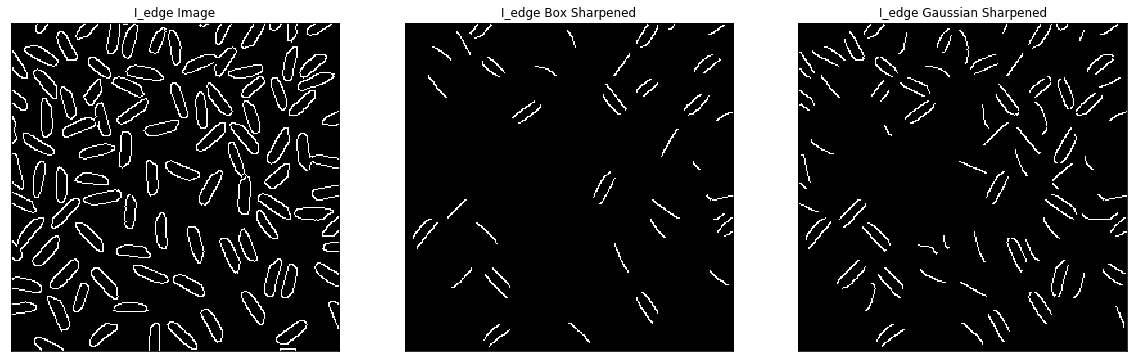

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("rice.png")

# filter the image Box filter
kernel = np.ones((5,5), np.float32)/(5*5)
imgBox = cv2.filter2D(img, -1, kernel)

boxDetails = img - imgBox
sharpenedBox = img + boxDetails

# filter the image Gaussian filter
imgGaus = cv2.GaussianBlur(img, (5,5), 2)

gausDetails = img - imgGaus
sharpenedGaus = img + gausDetails

riceGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
riceBoxGray = cv2.cvtColor(imgBox, cv2.COLOR_BGR2GRAY)
riceGausGray = cv2.cvtColor(imgGaus, cv2.COLOR_BGR2GRAY)

I_edge_rice = cv2.Canny(riceGray, 150, 200)
I_edge_riceBox = cv2.Canny(riceBoxGray, 150, 200)
I_edge_riceGaus = cv2.Canny(riceGausGray, 150, 200)

plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(I_edge_rice, cmap="gray")
plt.title("I_edge Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I_edge_riceBox, cmap="gray")
plt.title("I_edge Box Sharpened"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(I_edge_riceGaus, cmap="gray")
plt.title("I_edge Gaussian Sharpened"), plt.xticks([]), plt.yticks([])
plt.show()

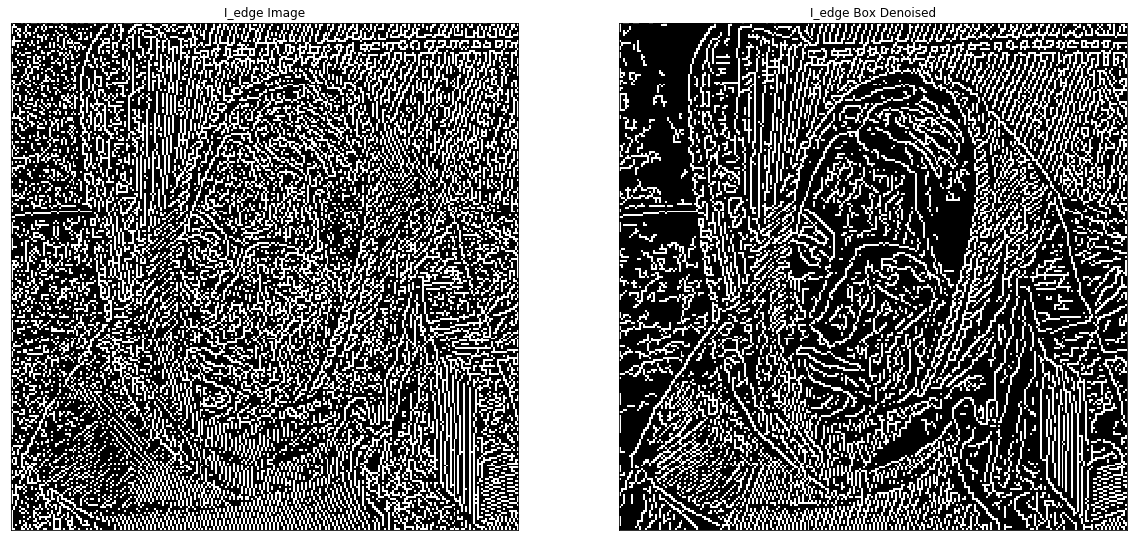

In [11]:
woman = cv2.imread("woman.png")

# filter the image Box filter
kernel = np.ones((3,3), np.float32)/(3*3)

# filter the image
womanBox = cv2.filter2D(woman, -1, kernel)

womanGray = cv2.cvtColor(woman, cv2.COLOR_BGR2GRAY)
womanBoxGray = cv2.cvtColor(womanBox, cv2.COLOR_BGR2GRAY)

ret1,thresh1 = cv2.threshold(womanGray,127,255,cv2.THRESH_BINARY)
ret2,thresh2 = cv2.threshold(womanBoxGray,127,255,cv2.THRESH_BINARY)

I_edge_woman = cv2.Canny(womanGray, ret1*.1, ret1*.2)
I_edge_womanBox = cv2.Canny(womanBoxGray, ret2*.1, ret2*.2)

plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(I_edge_woman, cmap="gray")
plt.title("I_edge Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(I_edge_womanBox, cmap="gray")
plt.title("I_edge Box Denoised"), plt.xticks([]), plt.yticks([])
plt.show()